In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.api.types import is_numeric_dtype
import scipy.stats as stats
from sklearn.model_selection import train_test_split

data = pd.read_csv('project_lol_data.csv')

In [2]:
col_num = len(data.columns)
print("Dataframe column number:", col_num)

Dataframe column number: 40


In [3]:
pd.options.display.max_columns = col_num
data.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [5]:
txt = ""
for x in  data.columns:
    txt = txt + x + ": " + data[x].dtype.name+ ", " + "\n"
print(txt)

gameId: int64, 
blueWins: int64, 
blueWardsPlaced: int64, 
blueWardsDestroyed: int64, 
blueFirstBlood: int64, 
blueKills: int64, 
blueDeaths: int64, 
blueAssists: int64, 
blueEliteMonsters: int64, 
blueDragons: int64, 
blueHeralds: int64, 
blueTowersDestroyed: int64, 
blueTotalGold: int64, 
blueAvgLevel: float64, 
blueTotalExperience: int64, 
blueTotalMinionsKilled: int64, 
blueTotalJungleMinionsKilled: int64, 
blueGoldDiff: int64, 
blueExperienceDiff: int64, 
blueCSPerMin: float64, 
blueGoldPerMin: float64, 
redWardsPlaced: int64, 
redWardsDestroyed: int64, 
redFirstBlood: int64, 
redKills: int64, 
redDeaths: int64, 
redAssists: int64, 
redEliteMonsters: int64, 
redDragons: int64, 
redHeralds: int64, 
redTowersDestroyed: int64, 
redTotalGold: int64, 
redAvgLevel: float64, 
redTotalExperience: int64, 
redTotalMinionsKilled: int64, 
redTotalJungleMinionsKilled: int64, 
redGoldDiff: int64, 
redExperienceDiff: int64, 
redCSPerMin: float64, 
redGoldPerMin: float64, 



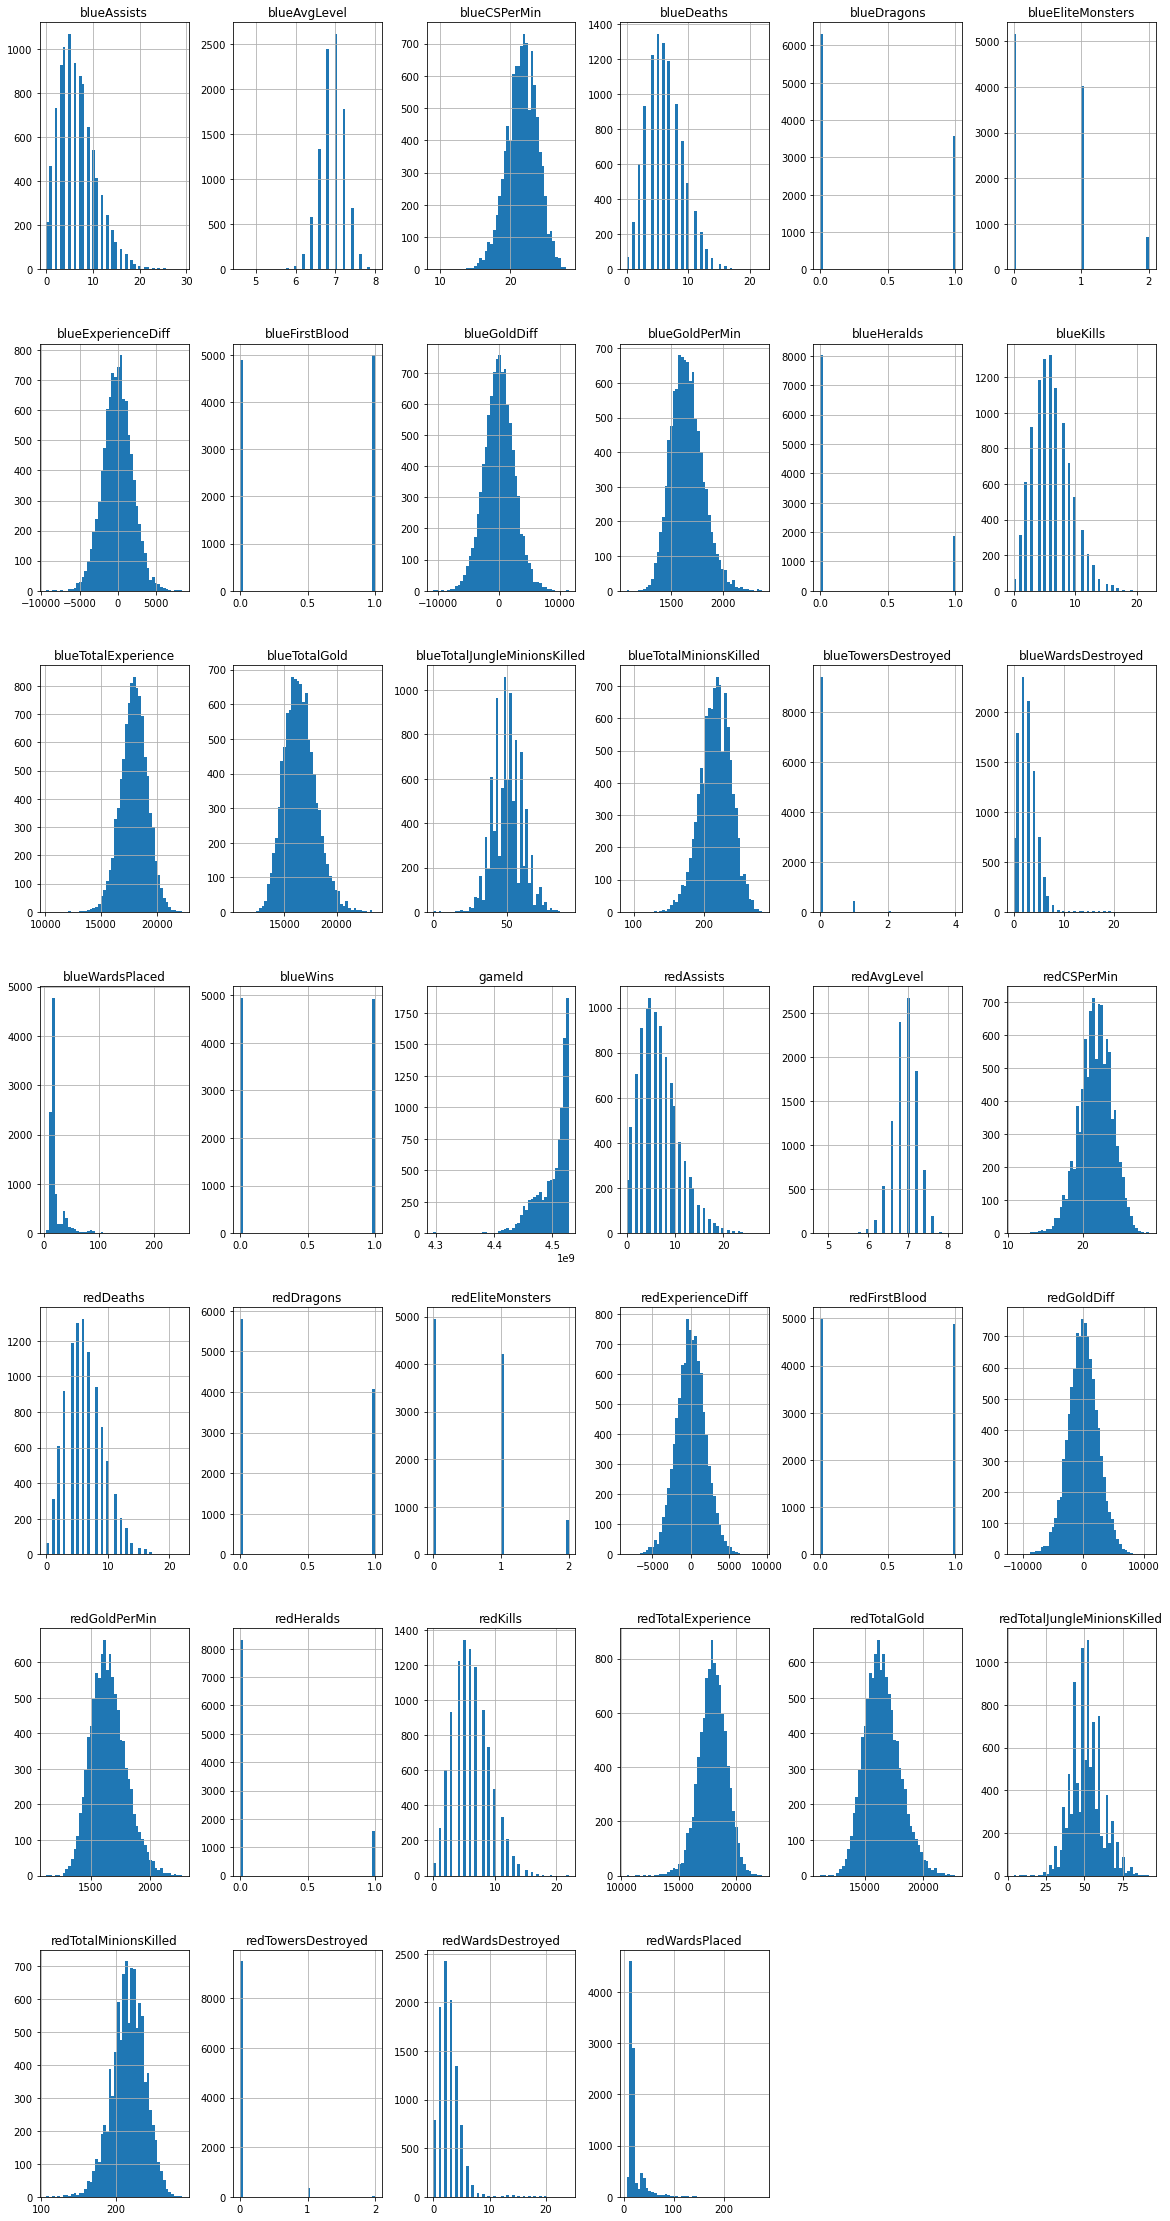

In [5]:
data.hist(bins = 50, figsize = (20,40))
plt.show()

In [6]:
data_blue = data.iloc[:,1:21]
data_blue.head()

data_red = data.drop(data.loc[:, 'gameId':'blueGoldPerMin'].columns, axis=1)
data_red.head()

                  


,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [7]:
B = data.drop(columns=['blueWins'])
W = data['blueWins']


In [8]:
B=(B-B.min())/(B.max()-B.min())
print((B))

        gameId  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
0     0.962031         0.093878            0.074074             1.0   
1     0.980146         0.028571            0.037037             0.0   
2     0.971990         0.040816            0.000000             0.0   
3     0.984497         0.155102            0.037037             0.0   
4     0.604712         0.285714            0.148148             0.0   
...        ...              ...                 ...             ...   
9874  0.999496         0.048980            0.074074             1.0   
9875  0.999170         0.200000            0.000000             0.0   
9876  0.998810         0.073469            0.037037             0.0   
9877  0.998442         0.036735            0.148148             1.0   
9878  0.981870         0.053061            0.000000             1.0   

      blueKills  blueDeaths  blueAssists  blueEliteMonsters  blueDragons  \
0      0.409091    0.272727     0.379310                0.0          0.

In [12]:
B_train, B_test, W_train, W_test = train_test_split(B, W, test_size=0.2, random_state=20)

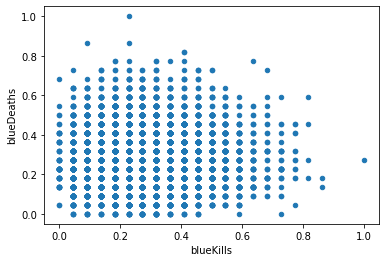

In [13]:
def remove_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    for name in list(df.columns):
        if is_numeric_dtype(df[name]):
            df = df[(df[name] > quant_df.loc[low, name]) | (df[name] < quant_df.loc[high, name])]
    return df

#df1 = df[~df.groupby('Data').transform( lambda x: abs(x-x.mean()) > 1.96*x.std()).values]

df = remove_outlier(pd.DataFrame(B,columns=['blueKills', 'blueDeaths']))

df.plot(x ='blueKills', y='blueDeaths', kind = 'scatter')
plt.show()


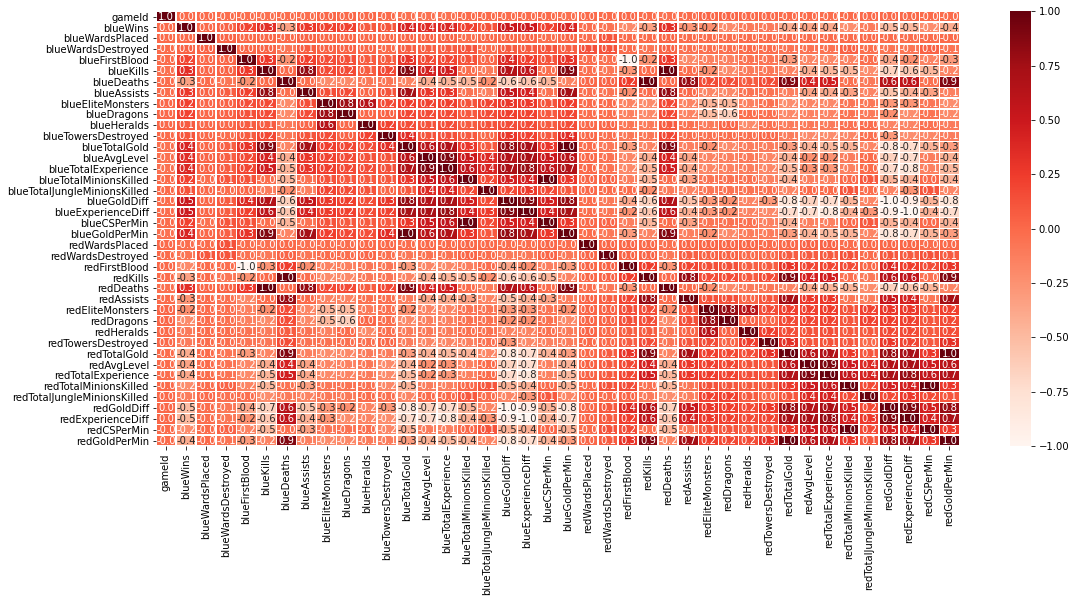

In [14]:
f, ax=plt.subplots(figsize=(18,8))
sns.heatmap(data.corr(), annot=True, linewidth=0.5, fmt='.1f', ax=ax,cmap="Reds")
corr = data.corr()

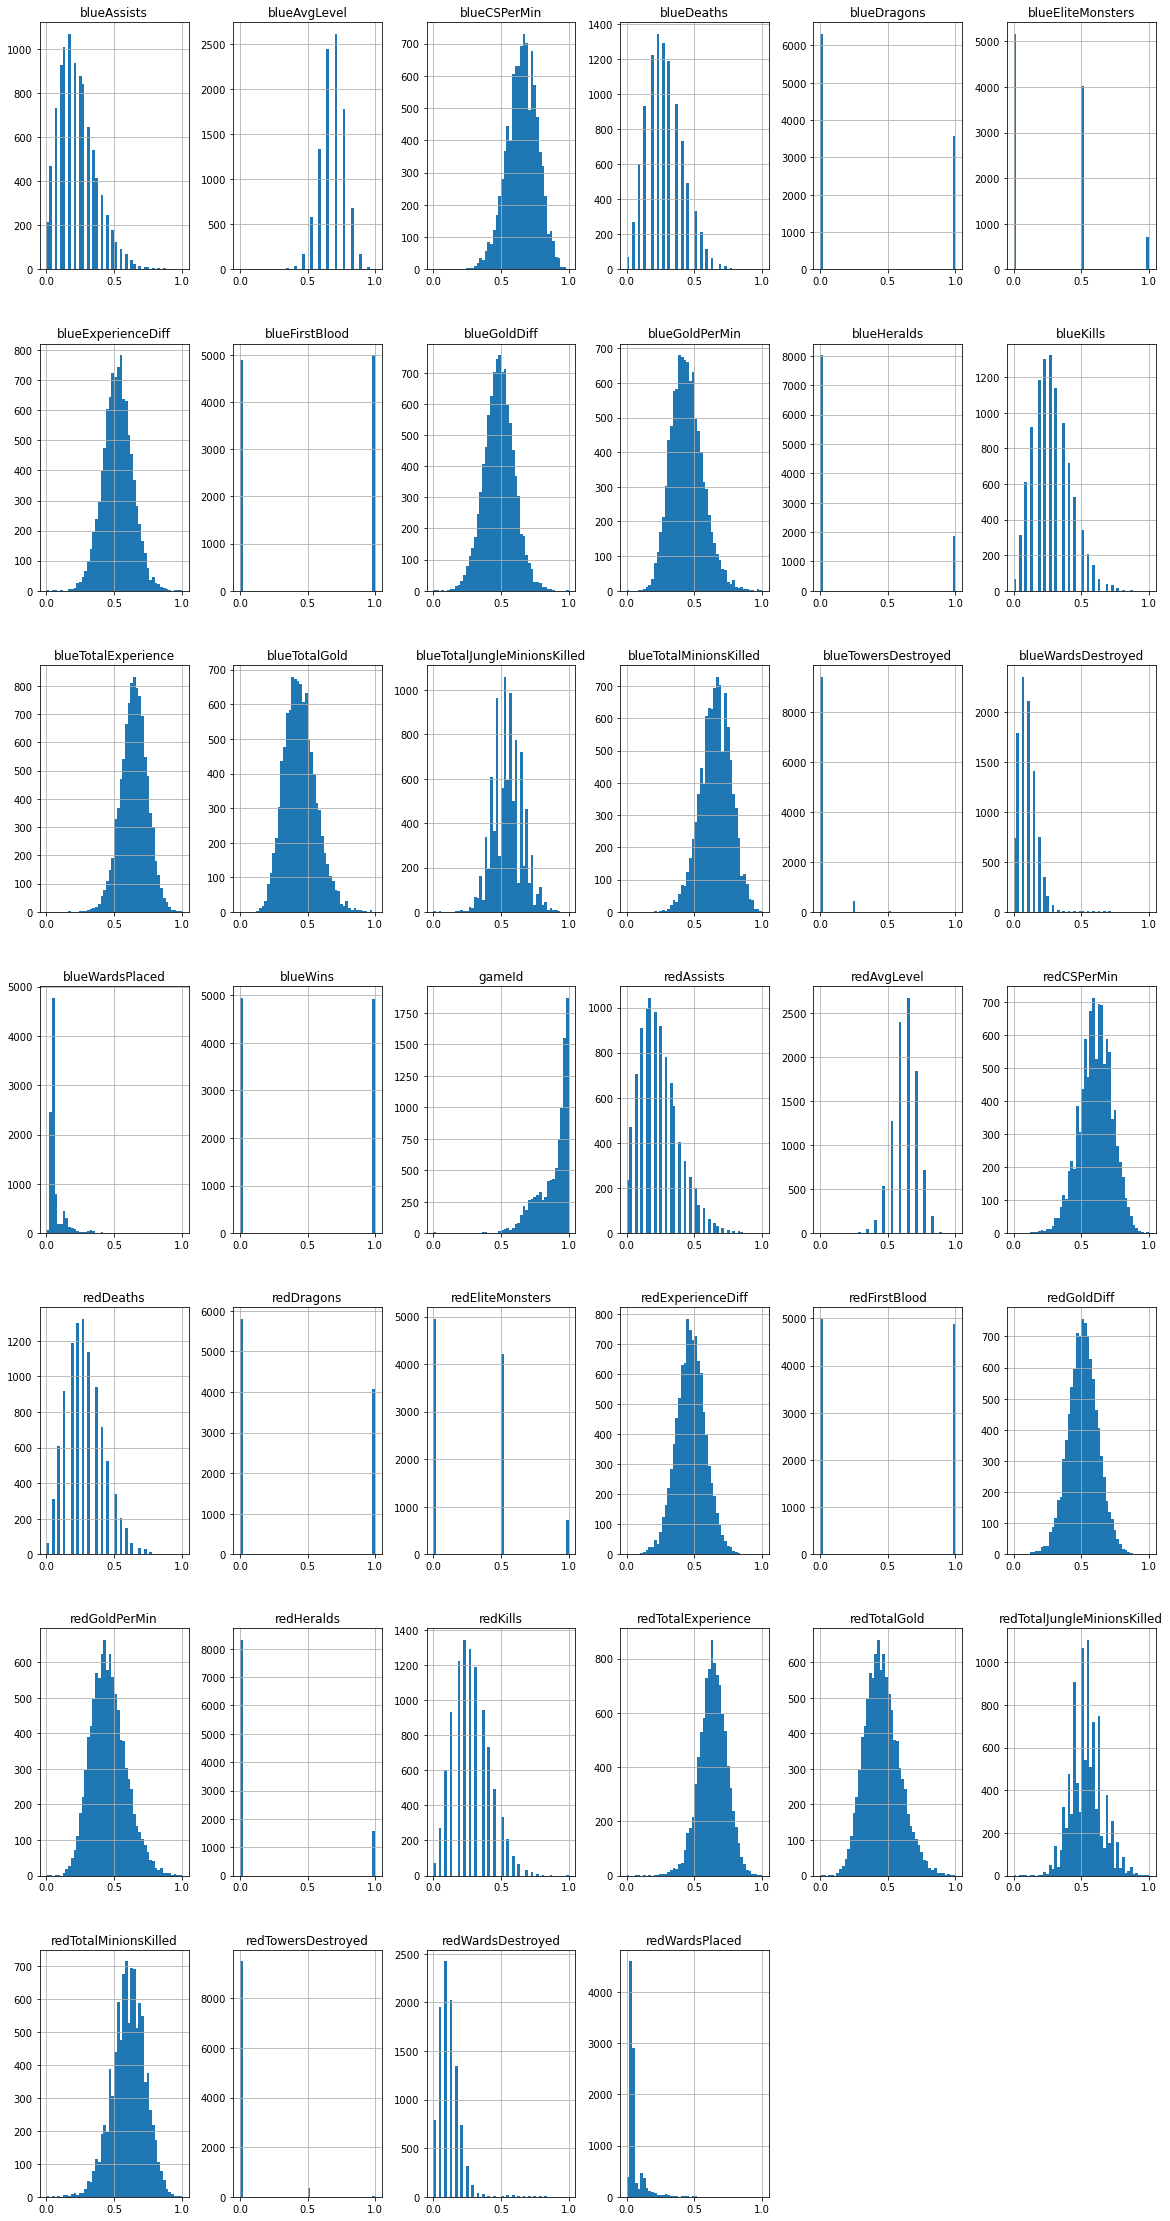

In [42]:
normalized_df.hist(bins = 50, figsize = (20,40))
plt.show()

In [15]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.75:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]

In [16]:
del data["gameId"]

In [17]:
txt = ""
for x in  data.columns:
    txt = txt + x + ": " + data[x].dtype.name+ ", " + "\n"
print(txt)

blueWins: int64, 
blueWardsPlaced: int64, 
blueWardsDestroyed: int64, 
blueFirstBlood: int64, 
blueKills: int64, 
blueDeaths: int64, 
blueEliteMonsters: int64, 
blueHeralds: int64, 
blueTowersDestroyed: int64, 
blueAvgLevel: float64, 
blueTotalMinionsKilled: int64, 
blueTotalJungleMinionsKilled: int64, 
redWardsPlaced: int64, 
redWardsDestroyed: int64, 
redFirstBlood: int64, 
redEliteMonsters: int64, 
redHeralds: int64, 
redTowersDestroyed: int64, 
redAvgLevel: float64, 
redTotalMinionsKilled: int64, 
redTotalJungleMinionsKilled: int64, 



In [18]:
col_num = len(data.columns)
print("Dataframe column number:", col_num)

Dataframe column number: 21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      9879 non-null   int64  
 1   blueWardsPlaced               9879 non-null   int64  
 2   blueWardsDestroyed            9879 non-null   int64  
 3   blueFirstBlood                9879 non-null   int64  
 4   blueKills                     9879 non-null   int64  
 5   blueDeaths                    9879 non-null   int64  
 6   blueEliteMonsters             9879 non-null   int64  
 7   blueHeralds                   9879 non-null   int64  
 8   blueTowersDestroyed           9879 non-null   int64  
 9   blueAvgLevel                  9879 non-null   float64
 10  blueTotalMinionsKilled        9879 non-null   int64  
 11  blueTotalJungleMinionsKilled  9879 non-null   int64  
 12  redWardsPlaced                9879 non-null   int64  
 13  red

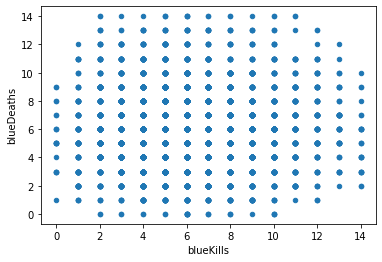

In [19]:
clean_df = pd.DataFrame(data)

clean_df.info()

Q1 = data.quantile(q=.25)
Q3 = data.quantile(q=.75)
IQR = data.apply(stats.iqr)
clean_df = clean_df[~((data < (Q1-1.5*IQR)) | (clean_df > (Q3+1.5*IQR))).any(axis=1)]

clean_df.plot(x ='blueKills', y='blueDeaths', kind = 'scatter')
plt.show()

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# fit the model
clf_nb = GaussianNB()
clf_nb.fit(B_train, W_train)

pred_nb = clf_nb.predict(B_test)

# get the accuracy score
acc_nb = accuracy_score(pred_nb, W_test)
print(acc_nb)

0.7257085020242915


In [21]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

tree = tree.DecisionTreeClassifier()

# search the best params
grid = {'min_samples_split': [5, 10, 20, 50, 100]},

clf_tree = GridSearchCV(tree, grid, cv=5)
clf_tree.fit(B_train, W_train)

pred_tree = clf_tree.predict(B_test)

# get the accuracy score
acc_tree = accuracy_score(pred_tree, W_test)
print(acc_tree)

0.6725708502024291


In [22]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

# search the best params
grid = {'n_estimators':[100,200,300,400,500], 'max_depth': [2, 5, 10]}

clf_rf = GridSearchCV(rf, grid, cv=5)
clf_rf.fit(B_train, W_train)

pred_rf = clf_rf.predict(B_test)
# get the accuracy score
acc_rf = accuracy_score(pred_rf, W_test)
print(acc_rf)

0.7186234817813765


In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() 

# search the best params
grid = {"n_neighbors":np.arange(1,100)}
clf_knn = GridSearchCV(knn, grid, cv=5)
clf_knn.fit(B_train,W_train) 

# get accuracy score
pred_knn = clf_knn.predict(B_test) 
acc_knn = accuracy_score(pred_knn, W_test)
print(acc_knn)

0.7110323886639676


In [24]:
data.to_csv('./modified_data.csv')